## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = mouse_metadata.merge(study_results, on = 'Mouse ID', how = 'outer')

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Checking the number of mice in the DataFrame.
#there are no duplicate mice in the dataset because this number matches the original dataset.

number_mice = len(mouse_merge_df['Mouse ID'].unique())
print(number_mice)

249


In [6]:
mouse_merge_df['Mouse ID'][0:5]

0    k403
1    k403
2    k403
3    k403
4    k403
Name: Mouse ID, dtype: object

In [7]:
mouse_merge_df['Timepoint'][0:5]

0     0
1     5
2    10
3    15
4    20
Name: Timepoint, dtype: int64

In [8]:
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
mouse_merge_df['duplicate'] = mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])

In [10]:
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_merge_df.loc[mouse_merge_df['duplicate']== True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [12]:
duplicate_rows = mouse_merge_df.loc[mouse_merge_df['duplicate']== True]
duplicate_rows.index

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge_clean_df = mouse_merge_df.drop(duplicate_rows.index)

In [14]:
# Checking the number of mice in the clean DataFrame.
mouse_merge_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [15]:
#unique mice.  Same as the number found above.
len(mouse_merge_clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

drug_list = mouse_merge_clean_df['Drug Regimen'].unique()
drug_stats = {}

for drug in drug_list:
    tumor_value_list = mouse_merge_clean_df.loc[mouse_merge_clean_df['Drug Regimen'] \
                                        == drug,:].loc[:,'Tumor Volume (mm3)']
    mean = tumor_value_list.mean()
    median = tumor_value_list.median()
    variance = tumor_value_list.var()
    standard_deviation = tumor_value_list.std()
    sem = tumor_value_list.sem()
    drug_stats[drug] = [mean, median, variance, standard_deviation, sem]

In [17]:
#a dictionary of regimen with results as [mean, median, variance, standard_deviation, sem]
drug_stats

{'Ramicane': [40.2167450667105,
  40.67323554,
  23.486703952095255,
  4.846308280753016,
  0.3209546065084816],
 'Capomulin': [40.67574114100001,
  41.557808879999996,
  24.947764120254856,
  4.9947736805840215,
  0.32934562340083096],
 'Infubinol': [52.88479510859551,
  51.82058438,
  43.12868412883606,
  6.5672432670669405,
  0.4922356938011383],
 'Placebo': [54.03358078635358,
  52.28893409,
  61.16808293669701,
  7.821002681031187,
  0.5813305510593875],
 'Ceftamin': [52.59117180960677,
  51.77615728000001,
  39.2901772732786,
  6.268187718414199,
  0.469820532752611],
 'Stelasyn': [54.23314911988949,
  52.43173664,
  59.45056167336598,
  7.7104190335782645,
  0.5731109332771458],
 'Zoniferol': [53.236506551593415,
  51.818479325,
  48.53335538938606,
  6.966588504381901,
  0.5163978968332167],
 'Ketapril': [55.23563764047869,
  53.698742644999996,
  68.55357711244596,
  8.279708757706757,
  0.6038598237739696],
 'Propriva': [52.39346338487179,
  50.909964985,
  43.138803497801035

In [18]:
#display this way
drug_stats_dict_long = pd.DataFrame.from_dict(drug_stats, orient = 'index', columns= ['mean', 'median', 'var', 'std', 'sem'])
drug_stats_dict_long

,mean,median,var,std,sem
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [19]:
drug_stats_dict_long.columns

Index(['mean', 'median', 'var', 'std', 'sem'], dtype='object')

In [20]:
#or that way
drug_stats_dict_wide = pd.DataFrame(drug_stats, index = ['mean', 'median', 'variance', 'std, dev.', 'SEM'])
drug_stats_dict_wide

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.393463,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.909965,52.509285
variance,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.138803,66.173479
"std, dev.",4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.568014,8.134708
SEM,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.525862,0.596466


In [21]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.



In [22]:
#this was much, much easier. My word
drug_stats_df = mouse_merge_clean_df[['Drug Regimen','Tumor Volume (mm3)']]


In [23]:
drug_stats_summary = drug_stats_df.groupby(by = 'Drug Regimen').agg(['mean', np.median, np.var, np.std, st.sem])

In [24]:
drug_stats_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#I was going to remove Timepoint from the index, but the pandas plot is predefined to use the label as the x_axis
mouse_merge_clean_df
treatment_timepoint_df = mouse_merge_clean_df.groupby(by = ['Drug Regimen', 'Timepoint']).count()

In [26]:
treatment_timepoint_df = treatment_timepoint_df.drop(columns = ['Sex', 'Age_months','Weight (g)','Tumor Volume (mm3)','Metastatic Sites','duplicate'])

In [27]:
treatment_timepoint_df = treatment_timepoint_df.rename(columns = {'Mouse ID':'mice_count'})
treatment_timepoint_df

mice_count
Drug Regimen Timepoint            
Capomulin    0                  25
             5                  25
             10                 25
             15                 24
             20                 23
...                            ...
Zoniferol    25                 16
             30                 15
             35                 14
             40                 14
             45                 14

[100 rows x 1 columns]

Text(0, 0.5, 'number of mice')

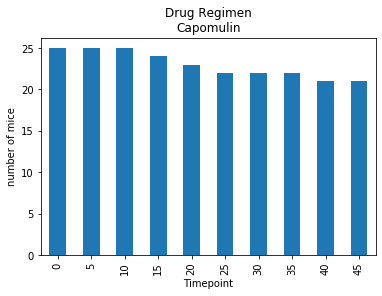

In [28]:
ax1 = treatment_timepoint_df.loc['Capomulin', :]['mice_count'].plot(kind='bar', title = 'Drug Regimen\nCapomulin')
ax1.set_xlabel('Timepoint')
ax1.set_ylabel('number of mice')


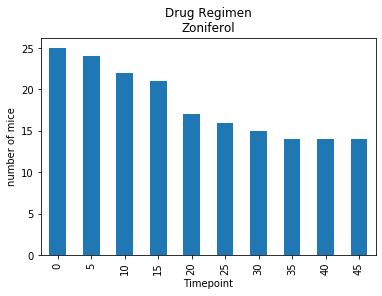

In [29]:
plt.figure()
ax2 = treatment_timepoint_df.loc['Zoniferol', :]['mice_count'].plot(kind='bar', title = 'Drug Regimen\nZoniferol')
ax2.set_xlabel('Timepoint')
ax2.set_ylabel('number of mice')
plt.savefig('../plots/test.png')

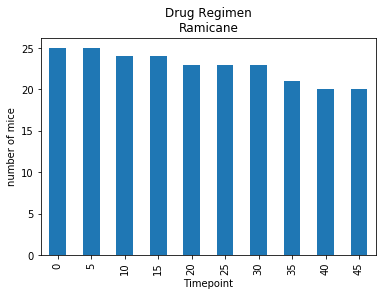

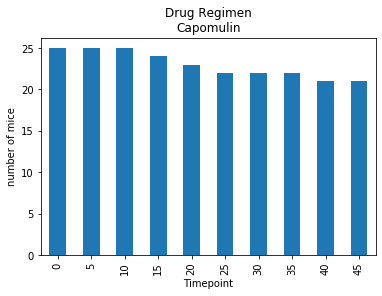

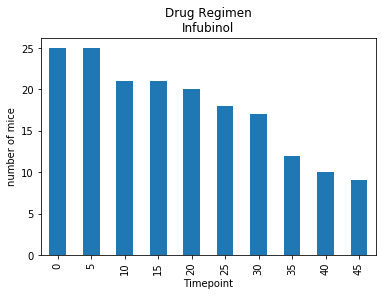

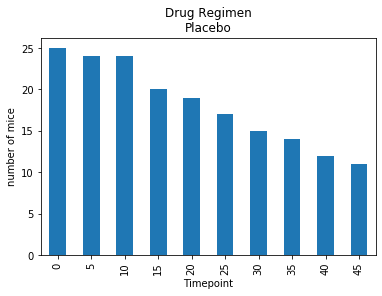

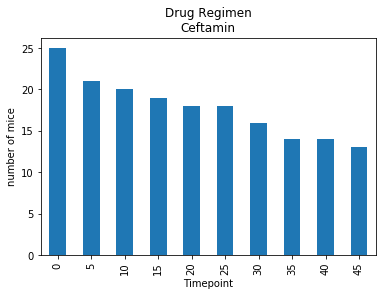

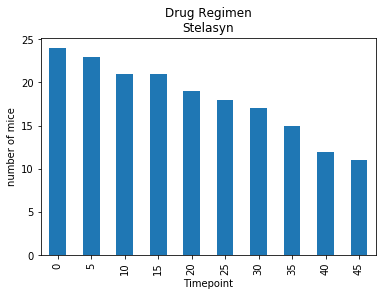

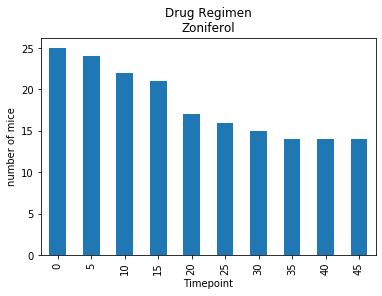

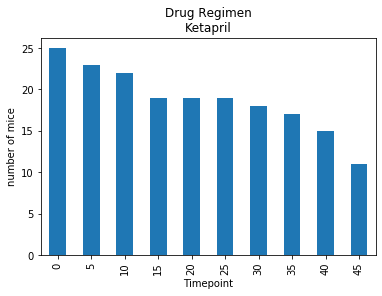

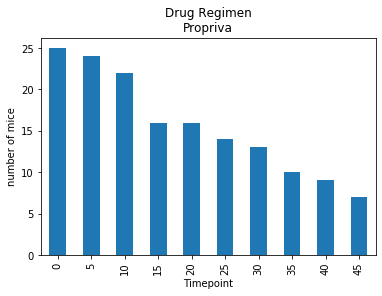

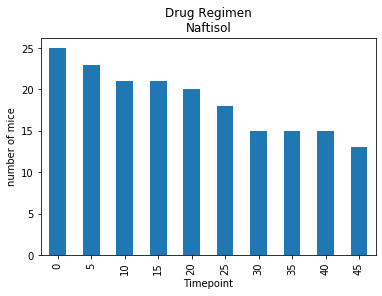

In [30]:
plot = {}
for drug in drug_list:
    plt.figure()
    plot[drug] = treatment_timepoint_df.loc[drug, :]['mice_count'].plot(kind='bar', title = 'Drug Regimen\n'+drug)
    plot[drug].set_xlabel('Timepoint')
    plot[drug].set_ylabel('number of mice')
    filename = "../plots/%s.png" % drug
    plt.savefig(filename)
    plt.close


In [31]:
mouse_merge_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [32]:
#%matplotlib notebook

In [33]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#a bit much for the x_axis, but I learned and it works!
x_axis = np.arange(len(mouse_merge_clean_df.loc[mouse_merge_clean_df['Drug Regimen'] == 'Ramicane', :]['Timepoint'].unique()))

In [34]:
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
treatment_timepoint_df

mice_count
Drug Regimen Timepoint            
Capomulin    0                  25
             5                  25
             10                 25
             15                 24
             20                 23
...                            ...
Zoniferol    25                 16
             30                 15
             35                 14
             40                 14
             45                 14

[100 rows x 1 columns]

In [36]:
treatment_timepoint_df.loc['Capomulin',:].index
x_axis_values = treatment_timepoint_df.loc['Capomulin',:].index
x_axis_values

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [37]:
#try again for x_axis
x_axis = np.arange(len(treatment_timepoint_df.loc['Capomulin',:].index))
#treatment_timepoint_df.loc['Capomulin',:]
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
#determine length of first index
drug_list = treatment_timepoint_df.reset_index(level = 'Timepoint').index.unique()
drug_list

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [39]:
y_axis = treatment_timepoint_df.loc['Capomulin', :]['mice_count']
y_axis

Timepoint
0     25
5     25
10    25
15    24
20    23
25    22
30    22
35    22
40    21
45    21
Name: mice_count, dtype: int64

In [40]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]


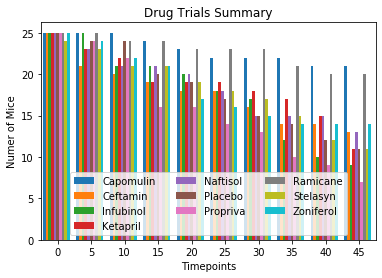

In [41]:
#I think this came out awesome!  I realize I could do the same thing above, but I am not sure what is preferred and
#I don't think I am supposed to know how to do this graph.
plt.figure()
width = 0.08
for value in range(0,len(drug_list)):
    y_axis = treatment_timepoint_df.loc[drug_list[value], :]['mice_count']
    #you have to scooch each bar over by the width of the bar each time a bar is added.
    plt.bar(x_axis - width*(5-value), y_axis, width = width, align = 'center', label = drug_list[value])
plt.xticks(tick_locations, x_axis_values)
plt.xlim(-.5, len(x_axis)-.5)
plt.legend(loc = 'lower center', ncol = 3, fontsize = 'medium')
plt.title('Drug Trials Summary')
plt.xlabel('Timepoints')
plt.ylabel('Numer of Mice')
plt.savefig('../plots/matplotgraph.png')
plt.show()

## Pie Plots

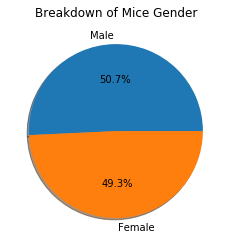

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_merge_clean_df['Sex'].value_counts()
mice_sex_df = mouse_merge_clean_df['Sex'].value_counts()
#mouse_merge_clean_df.plot(x = mouse_merge_clean_df['Sex'].unique(), y = mouse_merge_clean_df['Sex'].value_counts(), kind = 'pie')
mice_sex_df = mice_sex_df.rename('')
mice_sex_df.plot(kind='pie', title = 'Breakdown of Mice Gender', autopct = '%1.1f%%', shadow = True, use_index = False)
plt.show()

In [49]:
mice_sex_df

Male      958
Female    930
Name: Sex, dtype: int64

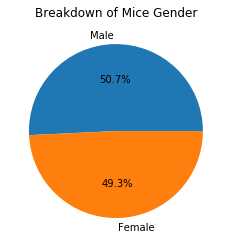

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
values = mice_sex_df

plt.title('Breakdown of Mice Gender')
plt.pie(values, labels = labels,autopct = '%1.1f%%' )
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_volume_df = mouse_merge_clean_df.loc[(mouse_merge_clean_df['Drug Regimen'] == 'Capomulin') & (mouse_merge_clean_df['Timepoint'] == 45),'Tumor Volume (mm3)']
final_volume_df

19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


#mice_sex_df.plot(kind='pie',
mouse_tumor = mouse_merge_clean_df[mouse_merge_clean_df['Drug Regimen'] == 'Capomulin'][:]   
#mouse_tumor
mouse_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicate
10,s185,Capomulin,Female,3,17,0,45.000000,0,False
11,s185,Capomulin,Female,3,17,5,43.878496,0,False
12,s185,Capomulin,Female,3,17,10,37.614948,0,False
13,s185,Capomulin,Female,3,17,15,38.177232,0,False
14,s185,Capomulin,Female,3,17,20,36.866876,0,False
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,False
1452,r157,Capomulin,Male,22,25,0,45.000000,0,False
1453,r157,Capomulin,Male,22,25,5,45.597064,0,False
1454,r157,Capomulin,Male,22,25,10,46.059608,0,False


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
